# Welcome to AI Camp XGBoost Workshop!
####    In this assignment you will be using the XGBoost to build a regression model.

# 1. Importing Libraries

In [1]:
import pandas as pd # data processing,one-hot-encoding
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score # evaluation metrics

# 2. Importing Data
####   We will be using the Data_Salary.csv dataset for this assignment:

In [17]:
#Read the data 'Data_Salary.csv' using pandas :
file_path= "Data_Salary.csv"

df = pd.read_csv(file_path)

In [20]:
#Print the first 5 rows of the data :
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
#Print the shape of the data , number of rows and columns :
df.shape

(375, 6)

# 3. Data Preprocessing

## 3.1. Splitting the dependent and independent variables:

In [19]:
#Create the X variable , which is the independent variable with all the columns except the 'Salary' column :
X = df.drop(columns = 'Salary')
#Show the first 5 rows of the X variable :
X

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
371,43.0,Male,Master's,Director of Operations,19.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0


In [21]:
#Create the y variable , which is the dependent variable with only the 'Salary' column :
y = df['Salary']
#Show the first 5 rows of the y variable :
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

## 3.4. One-Hot-Encoding:

In [22]:
#Show the data types of the X variable :
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
dtypes: float64(2), object(3)
memory usage: 14.8+ KB


In [23]:
#Use the get_dummies function to one-hot-encode the categorical columns of the X variable :
X =  pd.get_dummies(X, columns=['Gender', 'Education Level', 'Job Title'])
#Show the first 5 rows of the X variable :
X.head(5)

,Age,Years of Experience,Gender_0,Gender_Female,Gender_Male,Education Level_0,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD,Job Title_0,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>HINT : THE COLUMNS WITH THE TYPE 'OBJECT' ARE THE CATEGORICAL COLUMNS THAT NEED TO BE ONE-HOT-ENCODED</b>

# 4. Building the XGBoost Model:

## 4.1. Splitting The Data Into Train and Test Sets:

In [28]:
#Split the data into train and test sets with test size equals to 0.2 and random state equals to 42 :
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40,shuffle=True)

## 4.2.1 Building The Initial Model:

In [29]:
#Create and fit the XGBoost model with seed equals to 42, objective equals to 'reg:squarederror' and learning rate equals to 0.1 :
model = xgb.XGBRegressor(seed=42, objective='reg:squarederror', learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 4.2.2 Evaluating The Initial Model:

In [30]:
#Predict the y values of the test set :
y_pred = model.predict(X_test)


#Calculate the evaluation metrics of the model :
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

#Print the evaluation metrics of the model :
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 202915103.0677832
Mean Absolute Error (MAE): 9395.847916666668
R-squared (R2): 0.8857219781178947


## 4.3. Plotting Predicted vs Actual Values Bars:

In [34]:
#Create a dataframe with the actual and predicted values of the test set :
padf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#Show the first 5 rows of the dataframe :
padf.head()

,Actual,Predicted
318,40000.0,41832.757812
100,45000.0,45939.265625
85,95000.0,95704.843750
26,110000.0,89475.453125
191,170000.0,177005.718750


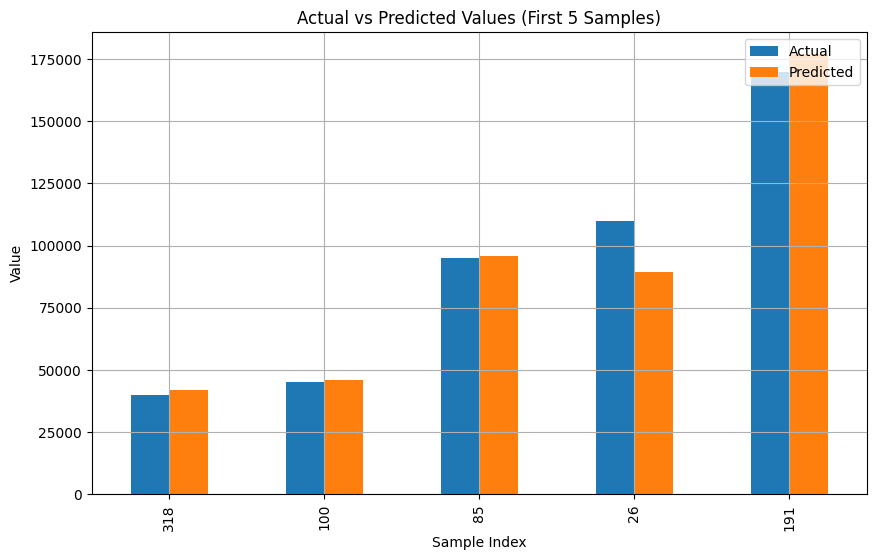

In [35]:
#Plot the first the dataframe in a bar plot using the plot function:
import matplotlib.pyplot as plt


padf.head().plot(kind='bar', figsize=(10, 6))

plt.title('Actual vs Predicted Values (First 5 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()